#Dicionário de mensagens

In [ ]:
mensagem = {"menu": """
            A. Mostrar dataset
            B. Quantidade de Homens e Mulheres
            C. Quantidade de Sobreviventes e Mortos
            D. Quantidade de mulheres que não Sobreviveram
            E. Proporção de sobreviventes entre homens e mulheres
            F. Idade com o maior número de mortos
            G. Média de idade dos homens sobreviventes
            H. Proporção de sobreviventes por sexo (passageiros prioritários)
            I. Quantidade de passageiro por classe
            J. Porcentagem de sobrevivente por classe
            K. Relação de sobreviventes e mortos agrupados por classe e sexo
            L. Relação de sobreviventes e mortos de homens com idade entre 24 e 30 anos
            M. Probabilidade de sobrevivência
            S. Sair
            """,
            "menuDataset": """
            A. Informações das Colunas
            B. Dados principais
            """
        }

menu = {
      "A" : "Mostrar dataset",
      "B" : "Quantidade de Homens e Mulheres",
      "C" : "Quantidade que Sobreviveram e Não sobreviveram",
      "D" : "Quantidade de mulheres que não Sobreviveram",
      "E" : "Proporção de sobreviventes entre homens e mulheres",
      "F" : "Idade com o maior número de mortos",
      "G" : "Média de idade dos homens sobreviventes",
      "H" : "Proporção de sobreviventes por sexo (passageiros prioritários)",
      "I" : "Quantidade de passageiro por classe",
      "J" : "Porcentagem de sobrevivente por classe",
      "K" : "Relação de sobreviventes e mortos agrupados por classe e sexo",
      "L" : "Relação de sobreviventes e mortos de homens com idade entre 24 e 30 anos",
      "M" : "Probabilidade de sobrevivência ",
      "S" : "Sair"
      }

#Gerenciador de arquivos para adequar o dataset



In [ ]:
# Importando arquivo pandas e numpy
import numpy as np
import pandas as pd

# O construtor da classe GerenciarArquivos é chamado sempre que uma instância da classe é criada.
class GerenciarArquivos():
  #no próprio construtor ele já processa e salva os arquivos para garantir que sempre estará atualizado
  def __init__(self):
    self.processarArquivos()

  # Leitura do CSV e processamento dos dados
  def processarArquivos(self):
    dataset = pd.read_csv('/content/titanic_data.csv')

    # Preenchendo valores faltantes no dataset com valores aleatórios para a idade, 'Unknown' para a cabine e 'S' para o porto de embarque
    valores_preenchimento = {
    'Age': np.random.randint(1, 100),
    'Cabin': 'Unknown',
    'Embarked': 'S',
    }

    dataset_preenchido = dataset.fillna(value=valores_preenchimento)

    # Removendo colunas 'SibSp', 'Parch', 'Ticket' do dataset
    dataset_adequado = dataset_preenchido.drop(['SibSp', 'Parch', 'Ticket'], axis=1)


    # Renomeando colunas do dataset para nomes em português
    novos_nomes = {
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine',
    'Embarked': 'Embarque',
    }
    dataset_adequado = dataset_adequado.rename(columns=novos_nomes)

    # Convertendo valores da coluna 'Sobreviveu' para 'Sim' se 1, 'Não' se 0
    coluna_sobreviveu = dataset_adequado['Sobreviveu']
    nova_coluna_sobreviveu = coluna_sobreviveu.apply(self.change_sobreviveu)
    dataset_adequado['Sobreviveu'] = nova_coluna_sobreviveu

    # Convertendo valores da coluna 'Sexo' para 'Mulher' se 'female', 'Homem' se 'male'
    coluna_sexo= dataset_adequado['Sexo']
    nova_coluna_sexo = coluna_sexo.apply(self.change_sexo)
    dataset_adequado['Sexo'] = nova_coluna_sexo

    # Salvando o dataset processado em um novo arquivo CSV
    dataset_adequado.to_csv('/content/novo_titanic_data.csv', index=False)

  # Método para mostrar informações do dataset original
  def mostrarInfo(self):
    dataset = pd.read_csv('/content/titanic_data.csv')
    dataset.info()

  # Método para mostrar os primeiros 10 e últimos 8 registros do dataset original combinados
  def mostrarDados(self):
    dataset = pd.read_csv('/content/titanic_data.csv')
    ds = pd.merge(dataset.head(10), dataset.tail(8), how = 'outer')
    df = pd.DataFrame(ds)
    return df

  # Função auxiliar para converter valores da coluna 'Sobreviveu' de 0 para 'Não' e de 1 para 'Sim'
  def change_sobreviveu(self, x):
    if x == 0:
        x = 'Não'
    else:
        x = 'Sim'
    return x

  # Função auxiliar para converter valores da coluna 'Sexo' de 'female' para 'Mulher' e de 'male' para 'Homem'
  def change_sexo(self, x):
    if x == 'female':
        x = 'Mulher'
    else:
        x = 'Homem'

    return x

#Estatisticas

In [ ]:
# Importando bibliotecas necessárias para plotagem de gráficos
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

class Estatisticas():
  # Inicialização da classe Estatisticas
  dataset_adequado = {}
  # O método __init__ é chamado sempre que uma instância da classe Estatisticas é criada.
  # Ele inicializa o objeto GerenciarArquivos e lê o dataset adequado do arquivo CSV.
  def __init__(self):
    GerenciarArquivos()# Inicialização do objeto GerenciarArquivos
    self.dataset_adequado = pd.read_csv('/content/novo_titanic_data.csv')# Leitura do dataset do arquivo CSV

  # Método para retornar a quantidade de homens e mulheres no dataset
  def qtdHomensMulheres(self):
    return self.dataset_adequado['Sexo'].value_counts()

  # Método para retornar a quantidade de passageiros que sobreviveram e não sobreviveram
  def qtdSobreviveram(self):
    return self.dataset_adequado['Sobreviveu'].value_counts()

  # Método para retornar a quantidade de mulheres que não sobreviveram
  def qtdMulheres(self):
    qtd = self.dataset_adequado[
    (self.dataset_adequado['Sexo'] == 'Mulher') & (self.dataset_adequado['Sobreviveu'] == 'Não')
    ].shape[0]
    return {"Mulher": qtd}

  # Método para calcular a proporção de sobreviventes por sexo
  def proporcaoSobrevivente(self):
    quantidade_M_S = self.dataset_adequado[
      (self.dataset_adequado['Sexo'] == 'Mulher') & (self.dataset_adequado['Sobreviveu'] == 'Sim')
      ].shape[0]

    quantidade_H_S = self.dataset_adequado[
    (self.dataset_adequado['Sexo'] == 'Homem') & (self.dataset_adequado['Sobreviveu'] == 'Sim')
    ].shape[0]

    total_passageiros = len(self.dataset_adequado[
      self.dataset_adequado['Sobreviveu'] == 'Sim'
    ])

    porcentagem_M_S = quantidade_M_S/total_passageiros
    porcentagem_H_S = quantidade_H_S/total_passageiros

    return { "Homem": f"{porcentagem_H_S: .2%}",
            "Mulher": f"{porcentagem_M_S: .2%}"
            }

  # Método para encontrar a idade com o maior número de não sobreviventes
  def idadeMaxMortos(self):
    numero_nao_sobreviventes_idade = self.dataset_adequado[
    (self.dataset_adequado['Sobreviveu'] == 'Não')
    ]['Idade'].value_counts()

    return {"Idade com maior número de mortos": int(numero_nao_sobreviventes_idade.idxmax()),
            "Quantidade": numero_nao_sobreviventes_idade.max()
            }

  # Método para calcular a idade média dos homens sobreviventes
  def idadeMediaHomens(self):
    idade_media_homens = self.dataset_adequado[
    (self.dataset_adequado['Sexo'] == 'Homem') & (self.dataset_adequado['Sobreviveu'] == 'Sim')
    ]

    return {"Media": idade_media_homens['Idade'].mean()}

  # Método para calcular a proporção de sobreviventes prioritários por sexo
  def proporcaoSobreviventePrioritario(self):
    quan_pass_prioritarios_total = self.dataset_adequado[
    ((self.dataset_adequado['Idade'] <= 15) | (self.dataset_adequado['Sexo'] == 'Mulher')) & (self.dataset_adequado['Sobreviveu'] == 'Sim')
    ]

    proporcao_sobreviventes = (quan_pass_prioritarios_total.groupby('Sexo')['Sobreviveu'].count())
    proporcao_sobreviventes_homem = proporcao_sobreviventes[0]/len(quan_pass_prioritarios_total)
    proporcao_sobreviventes_mulher = proporcao_sobreviventes[1]/len(quan_pass_prioritarios_total)

    return {"Homem": f"{proporcao_sobreviventes_homem: .2%}",
            "Mulher": f"{proporcao_sobreviventes_mulher: .2%}"
            }

  # Método para retornar a quantidade de passageiros por classe
  def qtdPassageiroClasse(self):
    quantidades = self.dataset_adequado['Classe'].value_counts()
    resposta = {}
    for i in range(1, 4):
      resposta.update({f"{i}º Classe": quantidades[i]})

    return resposta

  # Método para plotar o percentual de sobreviventes por classe
  def porcentagemPassageiroClasse(self):
    quantidade_passageiros_classe = self.dataset_adequado['Classe'].value_counts()
    quantidade_sobreviventes_classe = self.dataset_adequado[
    (self.dataset_adequado['Sobreviveu'] == 'Sim')
    ]['Classe'].value_counts()

    percentual_classe = []
    for i in range(1,4):
        percentual_classe.append((quantidade_sobreviventes_classe[i])/(quantidade_passageiros_classe[i]))

    dict_porc_classe = {
        'Classe': ['Classe 1', 'Classe 2', 'Classe 3'],
        'Percentual': np.array(percentual_classe)*100,
    }

    porcentagem_classe_df = pd.DataFrame.from_dict(dict_porc_classe)

    ax = porcentagem_classe_df.plot(kind='bar', xlabel='Classe', ylabel='Percentual de sobreviventes', title='Percentual de Sobreviventes por Classe')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
    ax.set_xticklabels(['Classe 1', 'Classe 2', 'Classe 3'])
    for container in ax.containers:
        ax.bar_label(container, fmt='%1.2f%%')
    plt.show()

    return porcentagem_classe_df

  # Método para plotar a relação entre classe, sexo e sobrevivência
  def relacaoClasseSexo(self):
    # Agrupando os dados por sexo e classe e contando o número de sobreviventes e não sobreviventes
    df_sobreviventes_classe_sexo = self.dataset_adequado.groupby(by=['Sexo', 'Classe'])['Sobreviveu'].apply(lambda x:( x=='Sim').sum())
    df_n_sobreviventes_classe_sexo = self.dataset_adequado.groupby(by=['Sexo', 'Classe'])['Sobreviveu'].apply(lambda x: (x=='Não').sum())

    # Criando um DataFrame com as contagens de sobreviventes e não sobreviventes
    df_agrupado = pd.DataFrame({'Sobreviventes': df_sobreviventes_classe_sexo, 'Não Sobreviventes': df_n_sobreviventes_classe_sexo})

    # Plotando um gráfico de barras para visualizar a relação entre classe, sexo e sobrevivência
    ax = df_agrupado.plot(kind='bar', ylabel='Quantidade de Passageiros').set_xticklabels(['Homem e Classe 1', 'Homem e Classe 2', 'Homem e Classe 3','Mulher e Classe 1', 'Mulher e Classe 2', 'Mulher e Classe 3' ])
    plt.show()

    return df_agrupado

  # Método para calcular a quantidade de homens na faixa etária de 24 a 30 anos nas classes 2 e 3 que sobreviveram
  def relacaoHomensIdade(self):
    quantidade_homens_24_30_classe_3 = self.dataset_adequado[
    (self.dataset_adequado['Idade']>24) &
    (self.dataset_adequado['Idade']<30) &
    ((self.dataset_adequado['Classe']==3)) &
    ((self.dataset_adequado['Sobreviveu']=='Sim')) &
    (self.dataset_adequado['Sexo']=='Homem')
    ].shape[0]

    # Contagem de homens na faixa etária de 24 a 30 anos na classe 2 que não sobreviveram
    quantidade_homens_24_30_classe_2 = self.dataset_adequado[
    (self.dataset_adequado['Idade']>24) &
    (self.dataset_adequado['Idade']<30) &
    ((self.dataset_adequado['Classe']==2)) &
    ((self.dataset_adequado['Sobreviveu']=='Não')) &
    (self.dataset_adequado['Sexo']=='Homem')
    ].shape[0]

    # Retornando um dicionário com as contagens
    return {"Sobreviveram na 3º Classe": quantidade_homens_24_30_classe_3, "Não sobreviveram na 2º Classe": quantidade_homens_24_30_classe_2}

  # Método para calcular a probabilidade condicional de sobrevivência dado o gênero e a classe
  def P(self, genero, classe):
    # Agrupando os dados por sexo e classe e contando o número total de passageiros por grupo
    df_classe_sexo = self.dataset_adequado.groupby(['Sexo', 'Classe']).size()

    # Agrupando os dados apenas dos sobreviventes por sexo e classe e contando o número total de sobreviventes por grupo
    df_classe_sexo_sobreviventes = self.dataset_adequado[
        (self.dataset_adequado['Sobreviveu'] == 'Sim')
    ].groupby(['Sexo', 'Classe']).size()

    # Calculando a probabilidade condicional de sobrevivência
    probabilidade_cond = df_classe_sexo_sobreviventes[genero][classe]/df_classe_sexo[genero][classe]
    # Plotando um gráfico de barras para visualizar a probabilidade condicional de sobrevivência por sexo e classe
    ax = (df_classe_sexo_sobreviventes/df_classe_sexo).plot(kind='bar', ylabel='Probabilidade Condicional de Sobrevivência')
    ax.set_title('Probabilidade Condicional de Sobrevivência por Sexo e Classe')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_xticklabels(['Homem e Classe 1', 'Homem e Classe 2', 'Homem e Classe 3','Mulher e Classe 1', 'Mulher e Classe 2', 'Mulher e Classe 3'])
    plt.show()

    # Retornando a probabilidade condicional formatada como porcentagem
    return '{:,.2%}'.format(probabilidade_cond)

  # Método para mostrar os dados em um formato legível
  def mostrarDados(self, dados):
    for i in dict(dados):
      print(str(i) + ": "+str(dados[i]))



# Menu

Relação de sobreviventes e mortos agrupados por classe e sexo


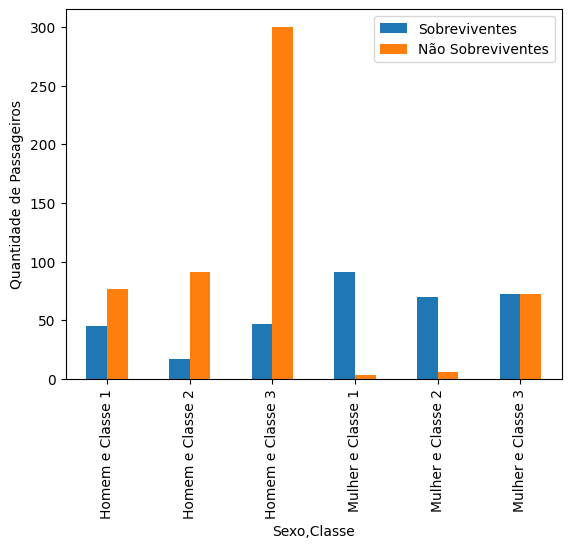

               Sobreviventes  Não Sobreviventes
Sexo   Classe                                  
Homem  1                  45                 77
       2                  17                 91
       3                  47                300
Mulher 1                  91                  3
       2                  70                  6
       3                  72                 72


In [ ]:
# Importa a função 'output' do módulo 'google.colab' para limpar a saída do notebook.
from google.colab import output

#menu

# Inicia a variável 'opcao' como uma string vazia.
opcao = ""
# Inicia um loop que continua até que a variável 'opcao' seja igual a "S".
while opcao != "S":
  # Solicita uma entrada do usuário e converte para letras maiúsculas.
  opcao = input(mensagem["menu"]).upper()

  # Verifica se a opção não é "S" (para sair).
  if opcao != "S":
    # Limpa a saída do notebook.
    output.clear()
    # Verifica se a opção está presente no dicionário 'menu'.
    if opcao in menu:
      # Imprime a opção do menu selecionada.
      print(menu[opcao])
      # Instancia um objeto da classe 'Estatisticas'.
      est = Estatisticas()

      # Se a opção for "A", relacionada a informações do dataset.
      if opcao == "A":
        # Solicita uma entrada do usuário e converte para letras maiúsculas.
        opcaoDataset = input(mensagem["menuDataset"]).upper()

        # Se a opção do dataset for "A".
        if opcaoDataset == "A":
          # Limpa a saída e mostra informações do arquivo.
          output.clear()
          GerenciarArquivos().mostrarInfo()
        # Se a opção do dataset for "B".
        elif opcaoDataset == "B":
          # Limpa a saída e exibe os dados do arquivo.
          output.clear()
          display(GerenciarArquivos().mostrarDados())
        else:
          # Se a opção do dataset não for "A" nem "B", imprime uma mensagem de opção inválida.
          print("Opção Inválida!")

      # Aqui seguem condições para outras opções do menu, com chamadas de métodos da classe 'Estatisticas'.
      elif opcao == "B":
        est.mostrarDados(est.qtdHomensMulheres())

      elif opcao == "C":
        est.mostrarDados(est.qtdSobreviveram())

      elif opcao == "D":
        est.mostrarDados(est.qtdMulheres())

      elif opcao == "E":
        est.mostrarDados(est.proporcaoSobrevivente())

      elif opcao == "F":
        est.mostrarDados(est.idadeMaxMortos())

      elif opcao == "G":
        est.mostrarDados(est.idadeMediaHomens())

      elif opcao == "H":
        est.mostrarDados(est.proporcaoSobreviventePrioritario())

      elif opcao == "I":
        est.mostrarDados(est.qtdPassageiroClasse())

      elif opcao == "J":
        print(est.porcentagemPassageiroClasse())

      elif opcao == "K":
        print(est.relacaoClasseSexo())

      elif opcao == "L":
        est.mostrarDados(est.relacaoHomensIdade())

      elif opcao == "M":
        genero = input("Digite o seu genero(M/F): ").upper()

        if genero == "M":
           sexo = "Homem"
        elif genero == "F":
          sexo = "Mulher"
        else:
          print("Gênero Inválido!")

        classe = input("Digite a classe que vc embarcaria ")
        if classe == "1" or classe == "2" or classe == "3":
          print(f"A probabilidade de sobrevivência é {est.P(sexo, int(classe))}")
        else:
          print("Classe Inválida!")
    else:
      # Se a opção selecionada não estiver no menu, imprime uma mensagem de opção inválida.
      print("Opção Inválida!")







